# Stock Market Analysis

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import pandas_datareader as pdr
from pandas_datareader import data, wb

from datetime import datetime

from __future__ import division

In [2]:
tech_list = ['GOOG','AMZN', 'AAPL', 'MSFT']

end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


for stock in tech_list:   
    globals()[stock] = data.get_data_yahoo(stock,start,end)

In [3]:
AAPL.info()
AAPL.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253 entries, 0 to 256
Data columns (total 7 columns):
date        253 non-null object
high        253 non-null float64
low         253 non-null float64
open        253 non-null float64
close       253 non-null float64
volume      253 non-null float64
adjclose    253 non-null float64
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


,date,high,low,open,close,volume,adjclose
0,2018-03-27,175.149994,170.729996,173.679993,170.830002,21327830.0,170.830002
1,2018-03-26,173.100006,166.440002,168.070007,172.770004,36399400.0,172.770004
2,2018-03-23,169.919998,164.940002,168.389999,164.940002,41028800.0,164.940002
3,2018-03-22,172.679993,168.600006,170.000000,168.850006,41490800.0,168.850006
4,2018-03-21,175.089996,171.259995,175.039993,171.270004,37054900.0,171.270004


## - historical view of the closing price

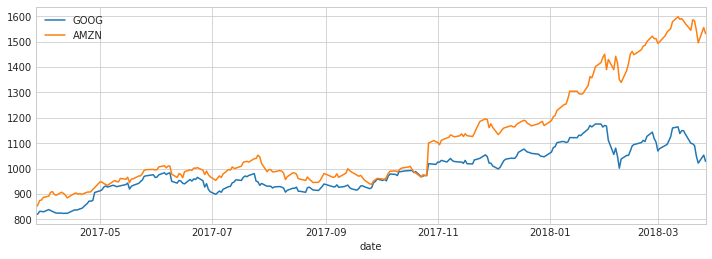

In [4]:
fig_size=(12,4)

fig, ax1 = plt.subplots()

GOOG.plot('date', 'adjclose', figsize=fig_size, ax=ax1)
AMZN.plot('date', 'adjclose', figsize=fig_size, ax=ax1)

plt.legend(['GOOG','AMZN'])
plt.show()

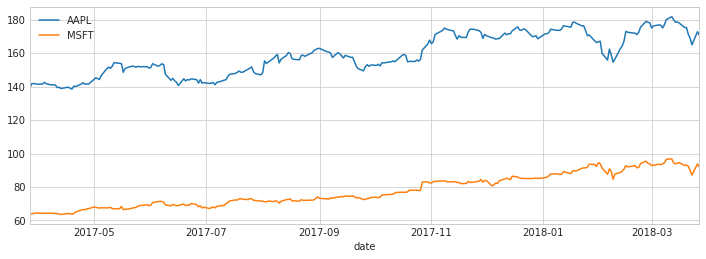

In [5]:
fix, ax1 = plt.subplots()

AAPL.plot('date', 'adjclose', figsize=(12,4), ax=ax1)
MSFT.plot('date', 'adjclose', figsize=(12,4), ax=ax1)

plt.legend(['AAPL','MSFT'])
plt.show()

## - covariation and correlation between  closing price for companies

In [6]:
adjclose_df = pd.concat([GOOG['adjclose'], AMZN['adjclose'], AAPL['adjclose'], MSFT['adjclose']], axis=1)
adjclose_df.columns = tech_list
adjclose_df.cov()

,GOOG,AMZN,AAPL,MSFT
GOOG,7580.924796,15473.597235,893.610898,777.102603
AMZN,15473.597235,40676.696294,1880.795984,1775.981026
AAPL,893.610898,1880.795984,148.315232,106.771182
MSFT,777.102603,1775.981026,106.771182,91.551512


In [7]:
adjclose_df.corr()

,GOOG,AMZN,AAPL,MSFT
GOOG,1.000000,0.881165,0.846628,0.937044
AMZN,0.881165,1.000000,0.771124,0.927198
AAPL,0.846628,0.771124,1.000000,0.909945
MSFT,0.937044,0.927198,0.909945,1.000000


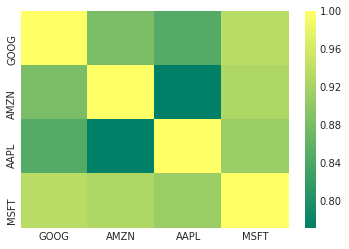

In [8]:
sns.heatmap(adjclose_df.corr(), cmap='summer')

## - total volume of stock being traded each month

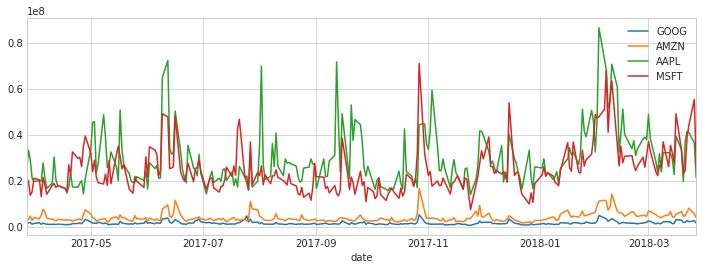

In [9]:
fig, ax1 = plt.subplots()

GOOG.plot('date', 'volume', legend=True, figsize=fig_size, ax=ax1)
AMZN.plot('date', 'volume', legend=True, figsize=fig_size, ax=ax1)
AAPL.plot('date', 'volume', legend=True, figsize=fig_size, ax=ax1)
MSFT.plot('date', 'volume', legend=True, figsize=fig_size, ax=ax1)

plt.legend(tech_list)
plt.show()



## - moving average to AAPL stocks closing price

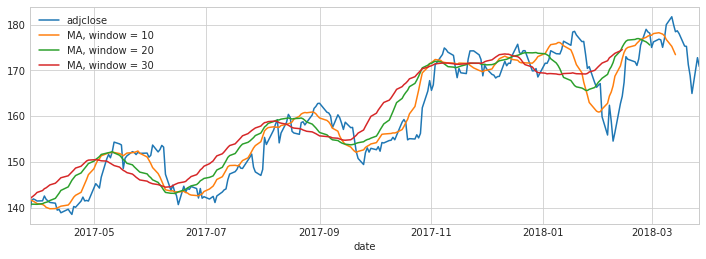

In [10]:
# pd.rolling_mean(GOOG['adjclose'],window=10)
# GOOG['adjclose'].rolling_mean()

windows = [10, 20, 30]
mv_av_dframe = DataFrame(AAPL[['date','adjclose']])


for win in windows:
    col_name = 'MA, window = ' + str(win)
    mv_av_dframe[col_name] = AAPL['adjclose'].rolling(window=win).mean()


mv_av_dframe.plot(x='date', figsize=fig_size)


## - daily percent change of AAPL stocks closing price

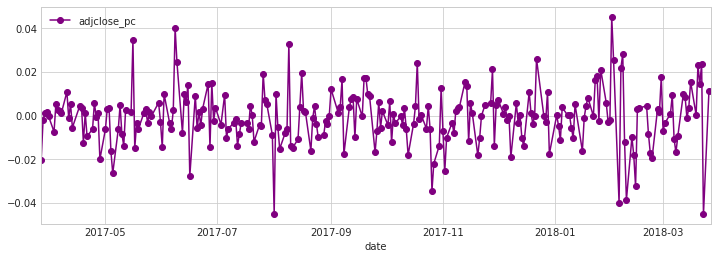

In [11]:
AAPL['adjclose_pc'] = AAPL['adjclose'].pct_change()
AAPL.plot(x='date', y='adjclose_pc', figsize=fig_size, marker='o', color = 'purple')

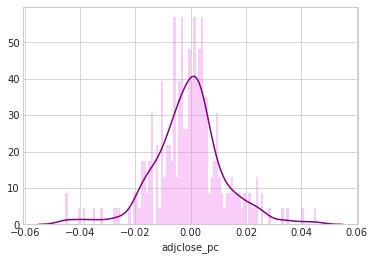

In [12]:
sns.distplot(AAPL['adjclose_pc'].dropna(), bins = 100, kde_kws = {'color':'purple'}, hist_kws = {'color':'violet'})

## - correlations between daily percent change of  'GOOG','AMZN', 'AAPL', 'MSFT' stocks closing price 

In [13]:
close_df_pct = adjclose_df.pct_change()
close_df_pct.dropna(inplace=True)
close_df_pct.head()

,GOOG,AMZN,AAPL,MSFT
1,0.023698,0.015568,0.011356,0.020901
2,-0.030041,-0.038757,-0.045320,-0.070377
3,0.026929,0.033004,0.023706,0.029938
4,0.039844,0.023911,0.014332,0.029959
5,0.006261,0.002940,0.023180,0.007028


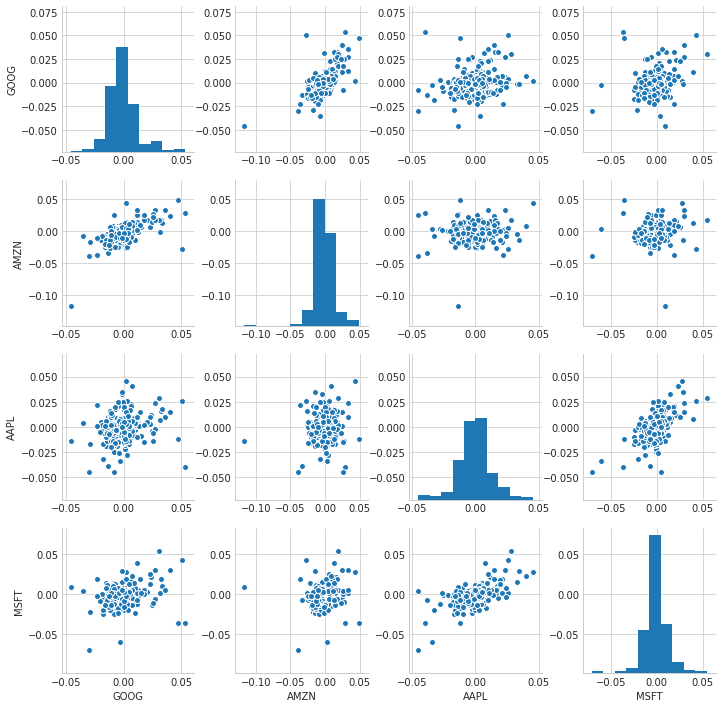

In [14]:
sns.pairplot(close_df_pct)

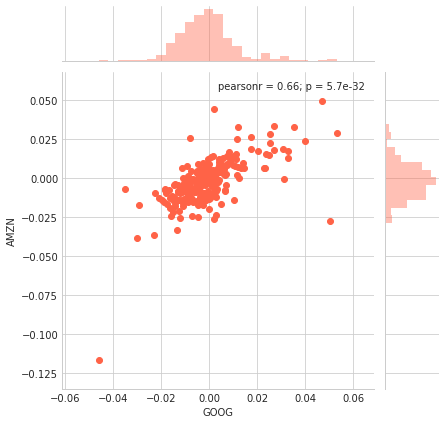

In [15]:
sns.jointplot(close_df_pct.GOOG, close_df_pct.AMZN, color = 'tomato')

/home/anna/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


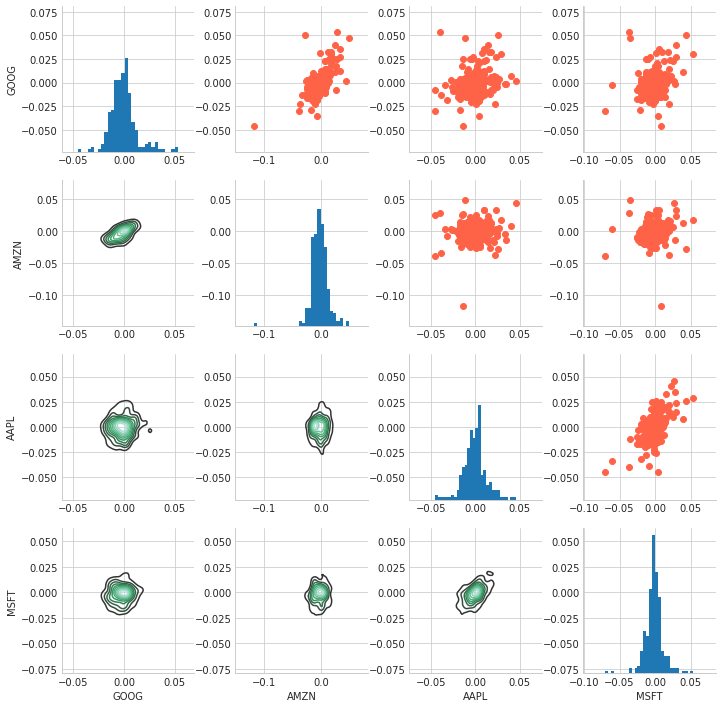

In [16]:
fig = sns.PairGrid(close_df_pct)

fig.map_upper(plt.scatter, color='tomato')
fig.map_lower(sns.kdeplot)
fig.map_diag(plt.hist,bins=30)

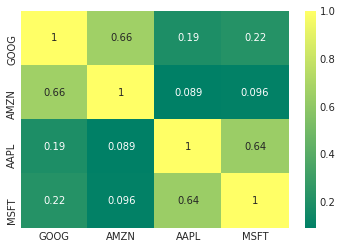

In [17]:
sns.heatmap(close_df_pct.corr(), cmap='summer', annot=True)

## Risk Analysis

## - expected pct change and std deviation for percent change of 'GOOG','AMZN', 'AAPL', 'MSFT' stocks closing price

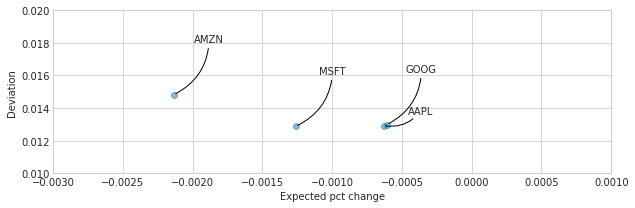

In [18]:
plt.figure(figsize=(10,3))
plt.scatter(close_df_pct.mean() , close_df_pct.std(), alpha = 0.5 )
plt.ylim([0.01,0.02])
plt.xlim([-0.003,0.001])


plt.xlabel('Expected pct change')
plt.ylabel('Deviation')



for label, x, y in zip(close_df_pct.columns, close_df_pct.mean(), close_df_pct.std()):
    xy_text = (50, 50)
    if label == 'AAPL':
        xy_text = (50, 10)
    plt.annotate(
        label, xy = (x, y), xytext = xy_text,
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

## - value at risk (amount that could be lost)

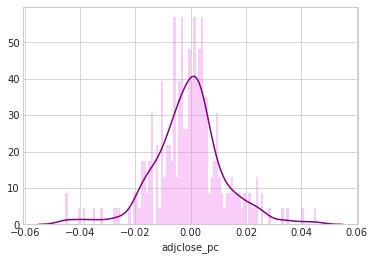

In [19]:
sns.distplot(AAPL['adjclose_pc'].dropna(), bins = 100, kde_kws = {'color':'purple'}, hist_kws = {'color':'violet'})

P(X<=x_a)>=a

P(X>=x_a)>=1-a

## - 0.05 - quantile of pct change

$$ {\displaystyle \mathbb {P} (X\leqslant x_{\alpha })\geqslant \alpha } $$ ,
$${\displaystyle \mathbb {P} (X\geqslant x_{\alpha })\geqslant 1-\alpha .} $$

In [20]:
close_df_pct['AAPL'].quantile(0.05)

-0.01898255990219359

In [21]:
close_df_pct.quantile(0.05)

GOOG   -0.017370
AMZN   -0.020809
AAPL   -0.018983
MSFT   -0.019536
Name: 0.05, dtype: float64

## - Value at Risk using the Monte Carlo method
### more info here: https://www.investopedia.com/articles/07/montecarlo.asp

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$ 

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

### - applying Monte Carlo method for Google stocks closing price¶

In [22]:
days = 365
dt = 1/days
mu = close_df_pct.mean()['GOOG']
sigma = close_df_pct.std()['GOOG']

In [23]:
def stock_monte_carlo(start_price,days,mu,sigma):
    '''returns simulated price array'''
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):        
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [24]:
GOOG.head()

,date,high,low,open,close,volume,adjclose
0,2018-03-27,1064.520020,1027.199951,1063.000000,1028.828369,1638707,1028.828369
1,2018-03-26,1055.630005,1008.400024,1046.000000,1053.209961,2572900,1053.209961
2,2018-03-23,1063.359985,1021.219971,1047.030029,1021.570007,2156700,1021.570007
3,2018-03-22,1082.900024,1045.910034,1081.880005,1049.079956,2667000,1049.079956
4,2018-03-21,1106.300049,1085.150024,1092.739990,1090.880005,1878900,1090.880005


Text(0.5,1,'Monte Carlo Analysis for Google')

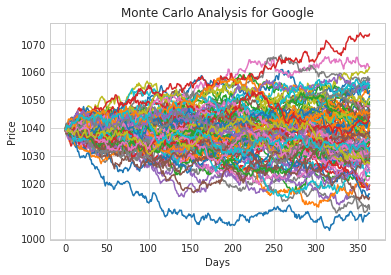

In [25]:
# Get start price from GOOG.head()
start_price = 1039.39

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')


In [26]:
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];


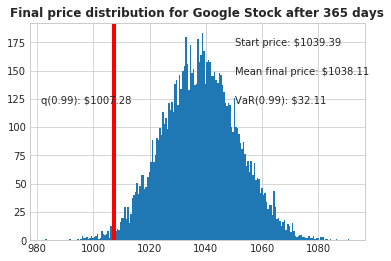

In [27]:
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');